## <font color = red> Ridge and Lasso </font>

###  Import useful tools and data. 

In [63]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn import *
from sklearn.model_selection import *


In [64]:
data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data', delimiter='\t')

### Create predictors and labels variables. 

In [65]:
X = data.iloc[: , 1:-2]
y = data.iloc[:,-2]

In [66]:
X.head(3), y.head(3)

(     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45
 0 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0
 1 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0
 2 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20,
 0   -0.430783
 1   -0.162519
 2   -0.162519
 Name: lpsa, dtype: float64)

In [67]:
X.shape, y.shape

((97, 8), (97,))

### Split dataset in train and test.  

With a 10-fold CV splitting I obtained weird results in term of prediction of lspa value. In order to get some understanding and insights of my work I have decided to do a "traditional" splitting.

In [68]:
X_train = X.iloc[:60]
y_train = y.iloc[:60]
X_test = X.iloc[60:]
y_test = y.iloc[60:]

### Define ridge prediction function. 

In [69]:
def ridge(x, X, y, L):
    
    # yhat = (x * X.T )  * [( X * X.T ) + (alpha * Identity)]^-1 * y
    # mat0 = x * X.T
    # mat1 = X * X.T 
    #lambda_id = i*mat2 for i {1 ... L+1}
    # mat2 = lambda * Identity
    # mat3 = [( X * X.T ) + (lambda * Identity)]^-1

    yhat_pred = []
    
    n, m = X.shape
    I = np.identity(n)
    
    first = np.dot(x,X.T)
    second = (np.dot(np.linalg.inv(np.dot(X, X.T) + L * I),y))
    yhat = np.dot(first, second)
    
    yhat_pred.append(yhat)
    
    return yhat_pred       

### Loop over lambda in order to get different ridge predictions for lpsa variable.   

In [70]:
alpha = [0,1,2,3,4,5,6,7,8,9,10]

y_pred = []

for i in range(0,11):

    yhat = ridge(X_test, X_train, y_train, alpha[i])
    y_pred.append(yhat)

### Calculate mean square error for each prediction.    

In [71]:
errors = []

for j in range(0,11):
    
    error = np.mean((y_pred[j] - np.array(y_test))**2)
    errors.append(error)

###  We plot the MSE as lambda value goes from 0 to 10.  

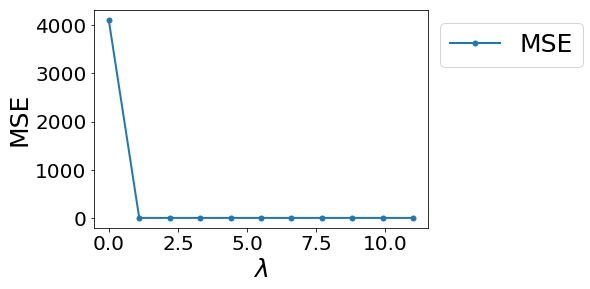

In [76]:
lambdas = np.linspace(0,11,11)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(axis='both', labelsize=20)
ax.set_xlabel('$\lambda$', fontsize=25)
ax.set_ylabel('MSE', fontsize=25)
ax.plot(lambdas, errors, marker='.', markersize=10, lw=2, markeredgewidth='1', label='MSE')
ax.legend(loc='best', fontsize=25, bbox_to_anchor=(1.5, 1))

We observe that for lambda > 0, MSE drops as a result of regularization of regresion parameters. If we accept little more bias (lambda>0), the variance is much lower. 

### Selection of the optimal lambda for ridge regression and comparison with sklearn.  

In [22]:
#Reminder 
new_errors = [round(n,4) for n in errors]
index = new_errors.index(2.0210)
print('MSE minimized for lambda value of :', index,'.')

MSE minimized for lambda value of : 9 .


In [23]:
#Get optimal lpsa_ridge value
optimal_ridge = ridge(X_test, X_train, y_train, 9)
results = np.mean(optimal_ridge)

print('The lpsa prediction using optimal lambda value is :', round(results,4),'.')

The lpsa prediction using optimal lambda value is : 2.3441 .


In [24]:
#Sanity check
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
results = np.mean(ridge.predict(X_test))

print('The lpsa prediction using sklearn Ridge function is :', round(results,4),'.')

The lpsa prediction using sklearn Ridge function is : 2.2839 .


### MSE for lineal, ridge and lasso regression.    

We create a linear regression model and we train it with our training dataset. Then, we collect its MSE value as a baseline.We do the same for ridge and lasso regression.

In [32]:
#linear model
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)

#ridge model
n_alphas_ridge = 200
alphas_ridge = np.logspace(-5, 5, n_alphas_ridge)
ridge = linear_model.Ridge()

ridge_error = []
for a in alphas_ridge:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    ridge_error.append([np.mean((ridge.predict(X_test) - y_test) ** 2)])


#lasso model
n_alphas_lasso = 300
alphas_lasso = np.logspace(-5, 1, n_alphas_lasso)
lasso = linear_model.Lasso()

lasso_error = []
for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    lasso_error.append([np.mean((lasso.predict(X_test) - y_test) ** 2)])


print('The linear model error is :', round(baseline_error,4),'.')
print('The ridge model error is :', min(ridge_error),'.')
print('The lasso model error is :', min(lasso_error),'.')

The linear model error is : 2.8208 .
The ridge model error is : [1.9730415017066512] .
The lasso model error is : [1.736747016893156] .


Lasso model is the more efficient in term of prediction of lpsa. It seems logical as lasso gets ride of variables with poor explicative power by giving parameters a weight equals to 0. On the other hand, ridge regression does not make such a selection and does not give 0 weight to its parameters. 

###  Ridge and lasso coefficients weight as a function of the regularization parameter lambda. 

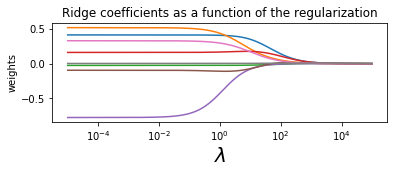

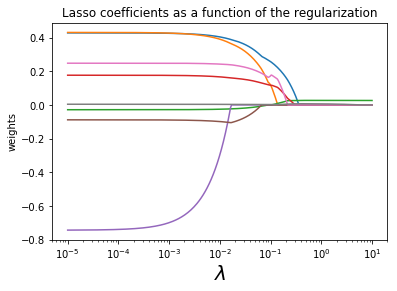

In [57]:
# Define for ridge regression

n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])
    
# Define for lasso regression 

n_alphas2 = 300
alphas2 = np.logspace(-5, 1, n_alphas2)
lasso = linear_model.Lasso(fit_intercept=False)

coefs2 = []
errors2 = []
for b in alphas2:
    lasso.set_params(alpha=b)
    lasso.fit(X_train, y_train)
    coefs2.append(lasso.coef_)
    errors2.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

# Plot the results   

for i in range(1,2):   
    plt.subplot(2,1,i)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize = 20)
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


ap = plt.gca()

ap.plot(alphas2, coefs2)
ap.set_xscale('log')
plt.xlabel('$\lambda$', fontsize = 20)
plt.ylabel('weights')
plt.axis('tight')
plt.title('Lasso coefficients as a function of the regularization')

plt.show()

###  Ridge and lasso MSE as a function of the regularization parameter lambda.

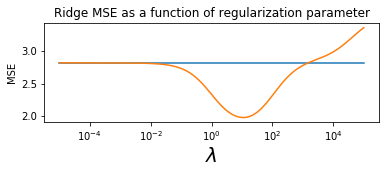

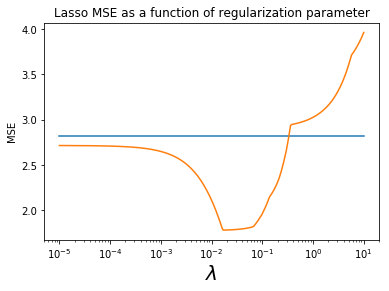

In [60]:
for i in range(1,2):   
    plt.subplot(2,1,i)

ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize = 20)
plt.ylabel('MSE')
plt.axis('tight')
plt.title('Ridge MSE as a function of regularization parameter')
plt.show()


ap = plt.gca()

ap.plot(alphas2, errors2)
ap.set_xscale('log')
plt.xlabel('$\lambda$', fontsize = 20)
plt.ylabel('MSE')
plt.axis('tight')
plt.title('Lasso MSE as a function of regularization parameter')
plt.show()

### An attempt (not finished): Lasso regression function 

In [ ]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,p = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(p):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            